In [1]:
!unzip foreign-exchange-rates-per-dollar-20002019.zip

Archive:  foreign-exchange-rates-per-dollar-20002019.zip
  inflating: Foreign_Exchange_Rates.csv  
  inflating: Foreign_Exchange_Rates.xlsx  


In [0]:
import pandas as pd
import numpy as np
df=pd.read_csv("Foreign_Exchange_Rates.csv",index_col=0)

In [0]:
df=df.replace("ND",np.nan)
df=df.bfill().ffill() 

In [3]:
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,9.4015,6.126,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.457,6.085,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,9.535,6.07,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,9.567,6.08,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,9.52,6.057,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [0]:
df=df.set_index("Time Serie")
df.index= pd.to_datetime(df.index)
df=df.astype(float)

In [5]:
df.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [6]:
df.tail()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,,
2019-12-25,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,1161.18,18.944,14.132,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,1161.18,18.944,14.132,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.819,14.025,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
2019-12-31,1.4225,0.8907,1.4826,0.7536,4.0190,1.2962,6.9618,7.7894,71.36,1155.46,18.860,13.973,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.30,0.9677,29.91,29.75


In [7]:
df.shape

(5217, 22)

In [0]:
date={}
date["DATE"] = pd.date_range("2000-01-03","2019-12-31", freq="D")

In [0]:
df_data=pd.DataFrame(data=date)
df_data=df_data.set_index("DATE")
df_data=df_data.merge(df,left_index=True,right_index=True,how="left")
#df_data=df_data.bfill().ffill()
df_data = df_data.fillna(method='ffill').fillna(method='bfill')

In [0]:
df_data['DATE']=df_data.index

In [11]:
df_data.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,DATE
DATE,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,2000-01-03
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,2000-01-04
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,2000-01-05
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,2000-01-06
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,2000-01-07


In [0]:
new_df=df_data[["INDIA - INDIAN RUPEE/US$","DATE"]].copy()

In [14]:
new_df.shape

(7303, 2)

In [0]:
new_df=new_df.rename(columns={"DATE": "ds", "INDIA - INDIAN RUPEE/US$": "y"})

In [14]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True, interval_width=0.90, changepoint_prior_scale=20)
m.fit(new_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future= m.make_future_dataframe(periods=365)
future.head()

,ds
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07


In [16]:
new_df.shape

(7303, 2)

In [17]:
new_df.head()

,y,ds
DATE,,
2000-01-03,43.55,2000-01-03
2000-01-04,43.55,2000-01-04
2000-01-05,43.55,2000-01-05
2000-01-06,43.55,2000-01-06
2000-01-07,43.55,2000-01-07


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-03,43.612952,41.611440,45.626433
1,2000-01-04,43.604735,41.506684,45.604175
2,2000-01-05,43.587803,41.548182,45.627764
3,2000-01-06,43.574754,41.518424,45.633735
4,2000-01-07,43.535618,41.460818,45.564892


In [19]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7663,2020-12-26,71.472316,62.957949,78.949114,62.443065,78.324648,0.088764,0.088764,0.088764,-0.023933,-0.023933,-0.023933,0.112698,0.112698,0.112698,0.0,0.0,0.0,71.561080
7664,2020-12-27,71.475692,62.504454,78.982088,62.375587,78.352356,0.075780,0.075780,0.075780,-0.027591,-0.027591,-0.027591,0.103371,0.103371,0.103371,0.0,0.0,0.0,71.551471
7665,2020-12-28,71.479067,62.671829,79.300226,62.308109,78.380064,0.117648,0.117648,0.117648,0.024310,0.024310,0.024310,0.093338,0.093338,0.093338,0.0,0.0,0.0,71.596715
7666,2020-12-29,71.482443,62.768786,78.739858,62.241144,78.407772,0.105841,0.105841,0.105841,0.023330,0.023330,0.023330,0.082511,0.082511,0.082511,0.0,0.0,0.0,71.588284
7667,2020-12-30,71.485818,62.535973,79.287212,62.174263,78.445776,0.085172,0.085172,0.085172,0.014339,0.014339,0.014339,0.070833,0.070833,0.070833,0.0,0.0,0.0,71.570990


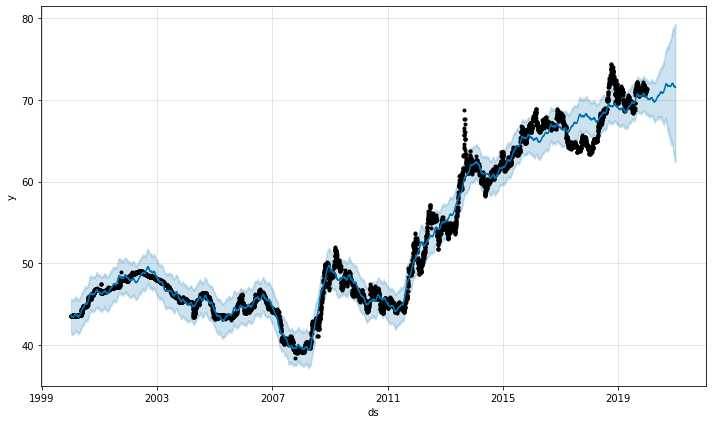

In [20]:
fig1 = m.plot(forecast)

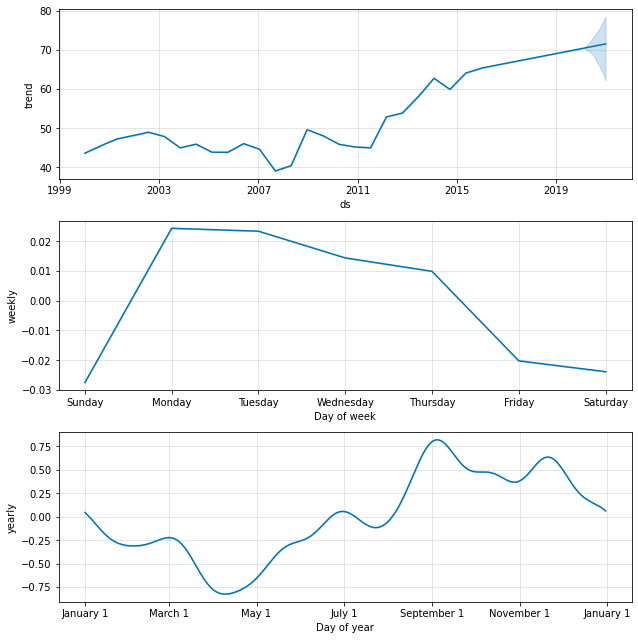

In [21]:
fig2 = m.plot_components(forecast)

In [22]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m,horizon = '365 days',period='180 days')
df_cv.head()

INFO:fbprophet:Making 33 forecasts with cutoffs between 2003-03-25 00:00:00 and 2018-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2003-03-26,47.663063,47.510694,47.809708,47.64,2003-03-25
1,2003-03-27,47.664443,47.517029,47.814948,47.59,2003-03-25
2,2003-03-28,47.665344,47.511145,47.821686,47.55,2003-03-25
3,2003-03-29,47.658398,47.515399,47.803067,47.55,2003-03-25
4,2003-03-30,47.651415,47.507534,47.811662,47.55,2003-03-25


In [23]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
12040,2019-12-27,69.473208,60.540946,78.535587,71.45,2018-12-31
12041,2019-12-28,69.457237,60.409010,78.136817,71.45,2018-12-31
12042,2019-12-29,69.440377,59.813224,78.037485,71.45,2018-12-31
12043,2019-12-30,69.475938,61.060765,78.178396,71.30,2018-12-31
12044,2019-12-31,69.457884,60.376040,78.754451,71.36,2018-12-31


In [24]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,6.306874,2.511349,1.928305,0.036654,0.028104,0.347403
1,38 days,6.438024,2.537326,1.952260,0.037131,0.028546,0.341991
2,39 days,6.584207,2.565971,1.978449,0.037653,0.028701,0.335775
3,40 days,6.737561,2.595681,2.005792,0.038187,0.029025,0.330816
4,41 days,6.887013,2.624312,2.030711,0.038674,0.029666,0.328753


In [25]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,36.251421,6.020915,4.742123,0.093346,0.080271,0.929855
325,362 days,36.291509,6.024243,4.742688,0.093357,0.080463,0.930686
326,363 days,36.333822,6.027754,4.743178,0.093369,0.080514,0.931516
327,364 days,36.405380,6.033687,4.745017,0.093405,0.080271,0.932347
328,365 days,36.508014,6.042186,4.748081,0.093463,0.080514,0.933177


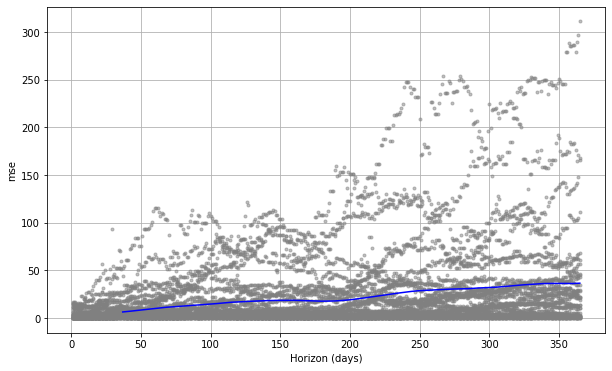

In [26]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')